<a href="https://colab.research.google.com/github/justoneye/Bootcamp-IA-G84/blob/main/Semana5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/flights.csv')
display(df)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,EV,4160,N11150,JAX,EWR,540,...,743.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,1635,N025AA,ATL,DFW,625,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,WN,119,N271LV,RSW,ATL,800,...,934.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,EV,4936,N738EV,MSP,IAD,900,...,1240.0,12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,DL,2319,N960DL,LGA,MSP,1010,...,1225.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,2015,12,31,4,UA,436,N69838,IAD,TPA,1230,...,1448.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5817,2015,12,31,4,WN,2265,N626SW,TUL,LAS,1345,...,1523.0,38.0,0,0,NaN,0.0,0.0,8.0,30.0,0.0
5818,2015,12,31,4,MQ,3083,N513MQ,STL,ORD,1358,...,1525.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819,2015,12,31,4,EV,2775,N624AE,SPI,DFW,1411,...,1605.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Calcular la cotización en la bolsa del Petróleo por regresión lineal

import pandas as pd

datos = pd.DataFrame({ "dia": ["2025/10/06", "2025/10/07", "2025/10/08", "2025/10/09", "2025/10/10"],
                      "precio_barril_brent": [65.47, 65.45, 66.25, 65.22, 62.73],
                      "TRM": [3874.18, 3853.19, 3867.54, 3879.8, 3894.99]
                       })

media_precio_barril = datos["precio_barril_brent"].mean()
media_TRM = datos["TRM"].mean()
print("Serie X (Media):", media_precio_barril, "\nSerie Y (Media):", media_TRM)


# B1 = Sum(i, 0, (xi-xm)) * (yi-ym) / Sum(i, 0, n) (xi-xm)**2

datos["xi-xm"] = datos["precio_barril_brent"] - media_precio_barril
datos["yi-ym"] = datos["TRM"] - media_TRM
datos["numerador"] = datos["xi-xm"] * datos["yi-ym"]
datos["denominador"] = datos["xi-xm"] ** 2

b1 = datos["numerador"].sum() / datos["denominador"].sum()

print("Pendiente de la recta (B1): ", b1)


# Intercepto: b0 = ym - xm * b1

b0 = media_TRM - (media_precio_barril * b1)

print("Intercepto de la recta (B0): ", b0)


# y = B0 - B1*x

datos["estimado"] = b0 + (b1 * datos["precio_barril_brent"])

display(datos)


# Verificación de modelo de regresión

verificacion = float(input("\nIngrese el valor de ayer del barrill"))
resultado = b0 + (b1*verificacion)
print("Resultado de estimación", resultado)

Serie X (Media): 65.024 
Serie Y (Media): 3873.9399999999996
Pendiente de la recta (B1):  -8.869176205959583
Intercepto de la recta (B0):  4450.649313616315


,dia,precio_barril_brent,TRM,xi-xm,yi-ym,numerador,denominador,estimado
0,2025/10/06,65.47,3874.18,0.446,0.24,0.10704,0.198916,3869.984347
1,2025/10/07,65.45,3853.19,0.426,-20.75,-8.83950,0.181476,3870.161731
2,2025/10/08,66.25,3867.54,1.226,-6.40,-7.84640,1.503076,3863.066390
3,2025/10/09,65.22,3879.80,0.196,5.86,1.14856,0.038416,3872.201641
4,2025/10/10,62.73,3894.99,-2.294,21.05,-48.28870,5.262436,3894.285890


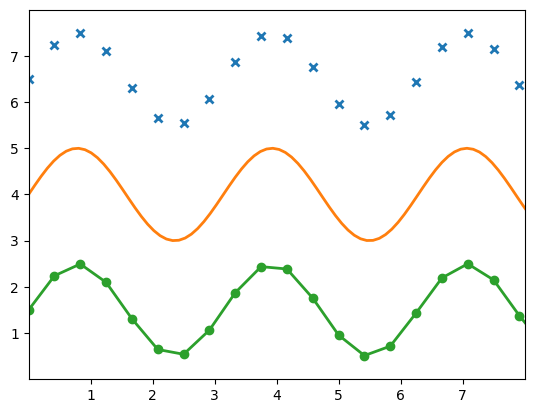

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Creando datos para graficar
x = np.linspace (0, 10, 100)
y = 4 + 1 * np.sin (2 * x)
x2 = np.linspace (0, 10, 25)
y2 = 4 + 1 * np.sin (2 * x2)

# Definiendo objetos para graficar
fig, ax = plt.subplots ()

# Graficando cada objeto de forma individual
ax.plot (x2, y2 + 2.5, 'x', markeredgewidth=2) # Grafico
ax.plot (x, y, linewidth=2.0) # Graficando linea naranja
ax.plot (x2, y2 - 2.5, 'o-', linewidth=2) # Graficando l

# Configurando ejes
ax.set (xlim=(0, 8), xticks=np.arange (1, 8),
        ylim=(0,8), yticks=np.arange (1,8))

plt.show()